<a href="https://colab.research.google.com/github/KIM-JAKE/MultiMAE/blob/main/MultiMAE_pract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/KIM-JAKE/MultiMAE.git

Cloning into 'MultiMAE'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 248 (delta 86), reused 72 (delta 66), pack-reused 134
Receiving objects: 100% (248/248), 4.01 MiB | 8.00 MiB/s, done.
Resolving deltas: 100% (121/121), done.


# Requirements.txt (조금 수정)

In [ ]:
!pip install torch==1.10.0 torchvision==0.11.1

# 목표 :  Depth 와 SemSeg에서 MultiMAE 재현하기

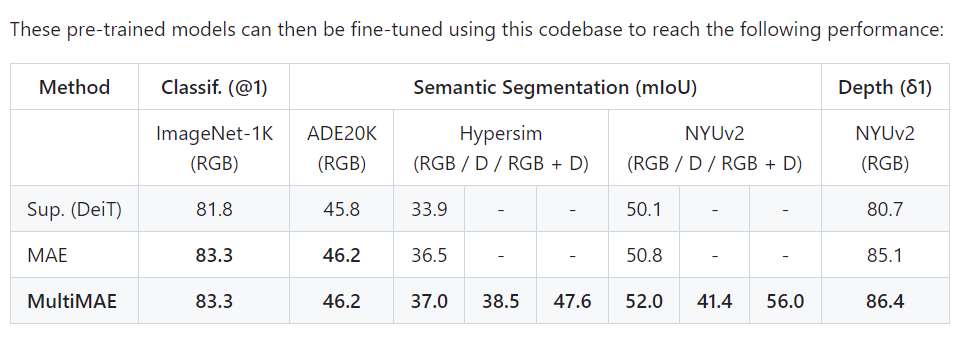

# 데이터 준비

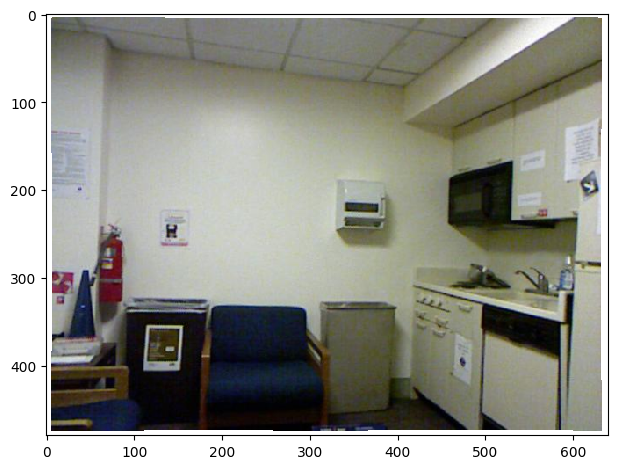

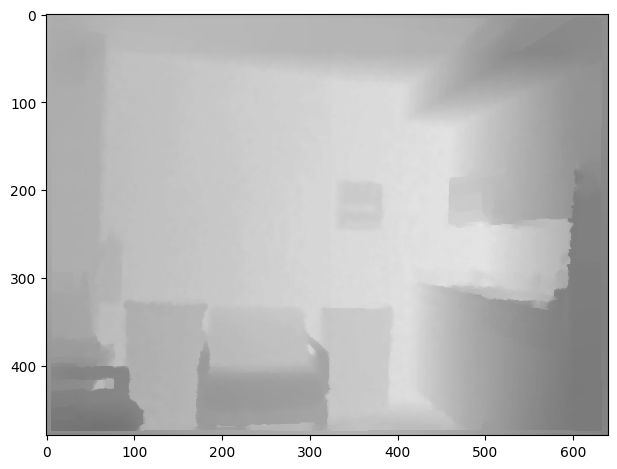

In [ ]:
import skimage.io as io
import numpy as np
import h5py

# data path
path_to_depth = '/content/drive/MyDrive/nyu_depth_v2_labeled.mat'

# read mat file
f = h5py.File(path_to_depth)

# read 0-th image. original format is [3 x 640 x 480], uint8
img = f['images'][0]

# reshape
img_ = np.empty([480, 640, 3])
img_[:,:,0] = img[0,:,:].T
img_[:,:,1] = img[1,:,:].T
img_[:,:,2] = img[2,:,:].T

# imshow
img__ = img_.astype('float32')
io.imshow(img__/255.0)
io.show()


# read corresponding depth (aligned to the image, in-painted) of size [640 x 480], float64
depth = f['depths'][0]

# reshape for imshow
depth_ = np.empty([480, 640, 3])
depth_[:,:,0] = depth[:,:].T
depth_[:,:,1] = depth[:,:].T
depth_[:,:,2] = depth[:,:].T

io.imshow(depth_/4.0)
io.show()

In [4]:
!pip install torch==1.10.0
!pip install torchvision==0.11.1
!pip install timm==0.4.12
!pip install einops==0.3.2
!pip install pandas==1.3.4
!pip install albumentations==1.1.0
!pip install wandb==0.12.11

ERROR: Could not find a version that satisfies the requirement torch==1.10.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2)
ERROR: No matching distribution found for torch==1.10.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.11.1 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2)
ERROR: No matching distribution found for torchvision==0.11.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source o

#터미널 용

In [1]:
!python "C:\Users\Jake\OneDrive\문서\test\MultiMAE\run_finetuning_semseg.py" --config "C:\Users\Jake\OneDrive\문서\test\MultiMAE\cfgs\finetune\semseg\nyu\ft_nyu_200e_multimae-b_rgb.yaml" --finetune "C:\Users\Jake\Downloads\multimae-b_98_rgb+-depth-semseg_1600e_multivit-afff3f8c.pth" --num_classes 40 --dataset_name "NYUv2 Depth" --data_path "C:\NYUv2\train" --eval_data_path "C:\NYUv2\test" --output_dir 'C:\Users\Jake' --device 'cpu'

python3: can't open file '/content/C:\\Users\\Jake\\OneDrive\\문서\\test\\MultiMAE\\run_finetuning_semseg.py': [Errno 2] No such file or directory


# 코랩 용

In [6]:
!nvidia-smi

Wed Jan 17 12:23:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!python /content/MultiMAE/run_finetuning_semseg.py --config "/content/MultiMAE/cfgs/finetune/semseg/nyu/ft_nyu_200e_mae-b_rgb.yaml" --batch_size 2 --finetune "/content/drive/MyDrive/MultiMAE/multimae-b_98_rgb+-depth-semseg_1600e_multivit-afff3f8c (1).pth" --num_classes 40 --dataset_name "NYUv2 Depth" --data_path "/content/drive/MyDrive/NYUv2/train" --eval_data_path "/content/drive/MyDrive/NYUv2/test" --output_dir '/content' --device 'cuda' --no_dist_eval

Key input_adapters.rgb.pos_emb: Position interpolate from 14x14 to 40x40
_IncompatibleKeys(missing_keys=['output_adapters.semseg.blocks.0.dwconv.weight', 'output_adapters.semseg.blocks.0.dwconv.bias', 'output_adapters.semseg.blocks.0.norm.weight', 'output_adapters.semseg.blocks.0.norm.bias', 'output_adapters.semseg.blocks.0.pwconv1.weight', 'output_adapters.semseg.blocks.0.pwconv1.bias', 'output_adapters.semseg.blocks.0.pwconv2.weight', 'output_adapters.semseg.blocks.0.pwconv2.bias', 'output_adapters.semseg.blocks.1.dwconv.weight', 'output_adapters.semseg.blocks.1.dwconv.bias', 'output_adapters.semseg.blocks.1.norm.weight', 'output_adapters.semseg.blocks.1.norm.bias', 'output_adapters.semseg.blocks.1.pwconv1.weight', 'output_adapters.semseg.blocks.1.pwconv1.bias', 'output_adapters.semseg.blocks.1.pwconv2.weight', 'output_adapters.semseg.blocks.1.pwconv2.bias', 'output_adapters.semseg.blocks.2.dwconv.weight', 'output_adapters.semseg.blocks.2.dwconv.bias', 'output_adapters.semseg.blocks.